In [1]:
from dfLoader import * 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
import argparse
import torch
from evalModel import printClassAccuracy
from dfLoader import classes
import torch.nn as nn
from sklearn.datasets import load_iris  # Replace this with your own dataset
t2np = lambda t: t.detach().cpu().numpy()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


/home/jingyuan/miniconda3/envs/mlp/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (None)/charset_normalizer (3.0.1) doesn't match a supported version!
  warnings.warn(


In [2]:
dataset = torch.load('datasets/Test_dataSet.pt')
X = dataset.tensors[0]
y = dataset.tensors[1]


In [3]:
type(X)

torch.Tensor

In [4]:
y.shape

torch.Size([6070])

In [5]:
from simCLR import SimCLR, DSModel

inputChannel = 1
latent_size = 512
linEval = True

model = SimCLR(inputChannel, latent_size)
model.load_state_dict(torch.load(f'models/SimCLR_2.pth'))
model.to(device)

DSmodel = DSModel(model,18, linEval, latent_size).to(device)

In [18]:
def init_weights(layer):
    if isinstance(layer, nn.Conv2d):
        nn.init.kaiming_uniform_(layer.weight, mode='fan_in', nonlinearity='relu')
    elif isinstance(layer, nn.Linear):
        nn.init.xavier_uniform_(layer.weight)

In [71]:
from resNet18LinEval import ResNet_18, ResNet_18_linEval
device = 'cpu' 
latent_size = 512
model = ResNet_18(1,18)
model.load_state_dict(torch.load(f'models/bestSupervised.pth'))
model.to(device)

DSmodel = ResNet_18_linEval(model,latent_size, 18).to(device)
# for param in DSmodel.parameters():
#         init_weights(param)


In [81]:
from autoEncoder import ConvAutoencoder, DSModel

 
inputChannel = 1
latent_size = 512
linEval = True

model = ConvAutoencoder(inputChannel, latent_size)
model.load_state_dict(torch.load(f'models/Autoencoder.pth'))
model.to(device)

DSmodel = DSModel(model,18, latent_size, linEval).to(device)

In [6]:
X = DSmodel(X.view(-1,1,128,32).to(device))


In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset and labels
X = t2np(X) # Your dataset in high-dimensional space
X = X.reshape(X.shape[0], -1)
labels = t2np(y) # Your class labels for each point

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

/home/jingyuan/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jingyuan/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [8]:
classes = ['Myotis daubentonii', 'Plecotus auritus', 'Pipistrellus pipistrellus' , #'Bat',
 'Nyctalus leisleri' ,'Pipistrellus pygmaeus', 'Myotis mystacinus',
 'Myotis nattereri', 'Pipistrellus nathusii', 'Nyctalus noctula',
 'Eptesicus serotinus', 'Barbastellus barbastellus', 'Myotis brandtii',
 'Myotis alcathoe' ,'Myotis bechsteinii', 'Plecotus austriacus',
 'Rhinolophus ferrumequinum', 'Rhinolophus hipposideros','noise']

In [11]:
def plot_tsne(X, y, labels):
    plt.figure(figsize=(15, 13))
    unique_labels = np.unique(y)
    num_classes = len(unique_labels)
    colormap = plt.cm.get_cmap('tab20', num_classes)  # You can use other colormaps, like 'tab20', 'tab20b', 'tab20c', 'viridis', 'plasma', 'inferno', or 'magma'

    for i, label in enumerate(unique_labels):
        color = colormap(i)
        plt.scatter(X[y == label, 0], X[y == label, 1], label=labels[i], color=color, alpha=0.7)

    plt.legend()
    plt.xlabel("Dimension 1", size = 25)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.ylabel("Dimension 2",size = 25)
    plt.title("Autoencoder", size = 25)
    plt.savefig("Autoencoder_tsne.png", dpi=300)
    plt.show()

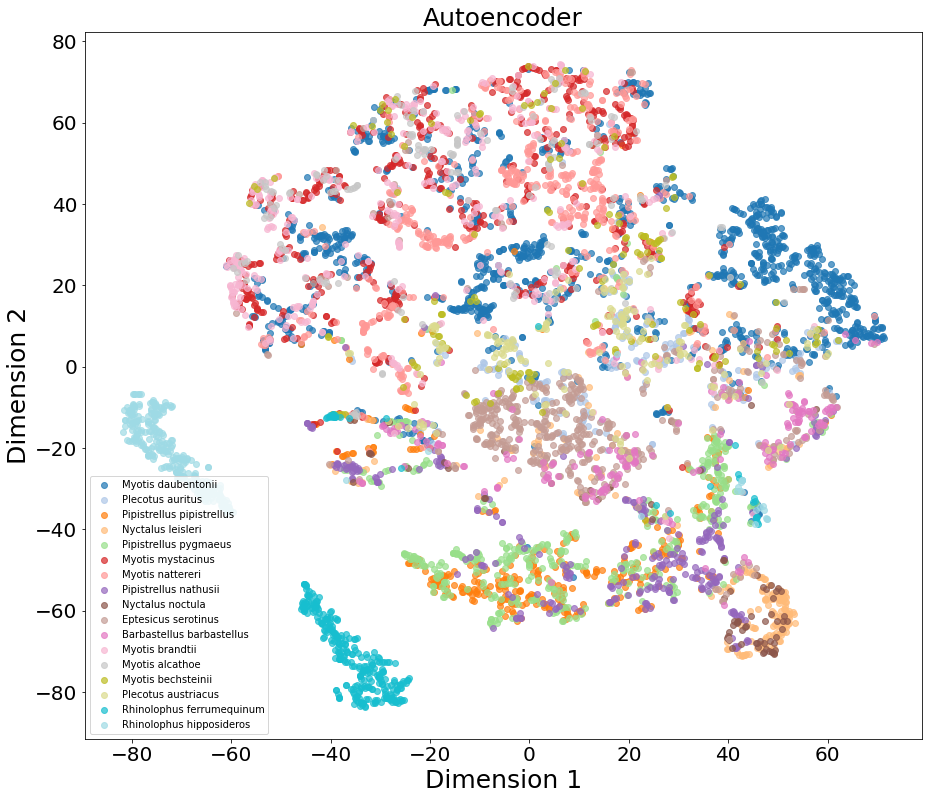

In [12]:
plot_tsne(X_tsne, y, classes)

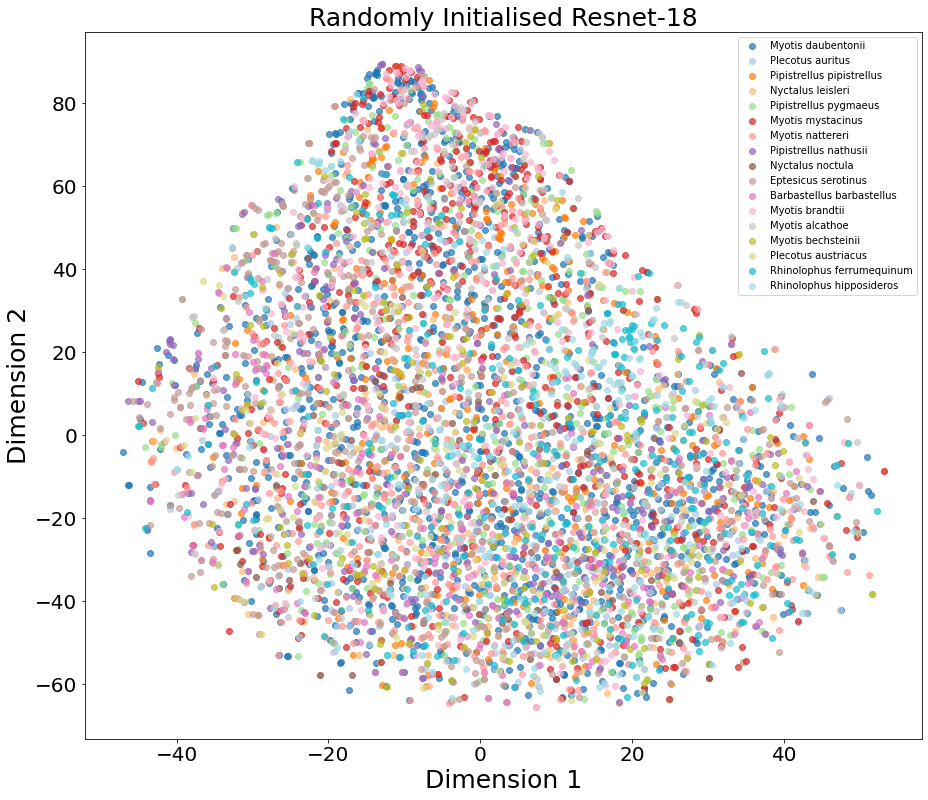

In [55]:
plot_tsne(X_tsne, y, classes)

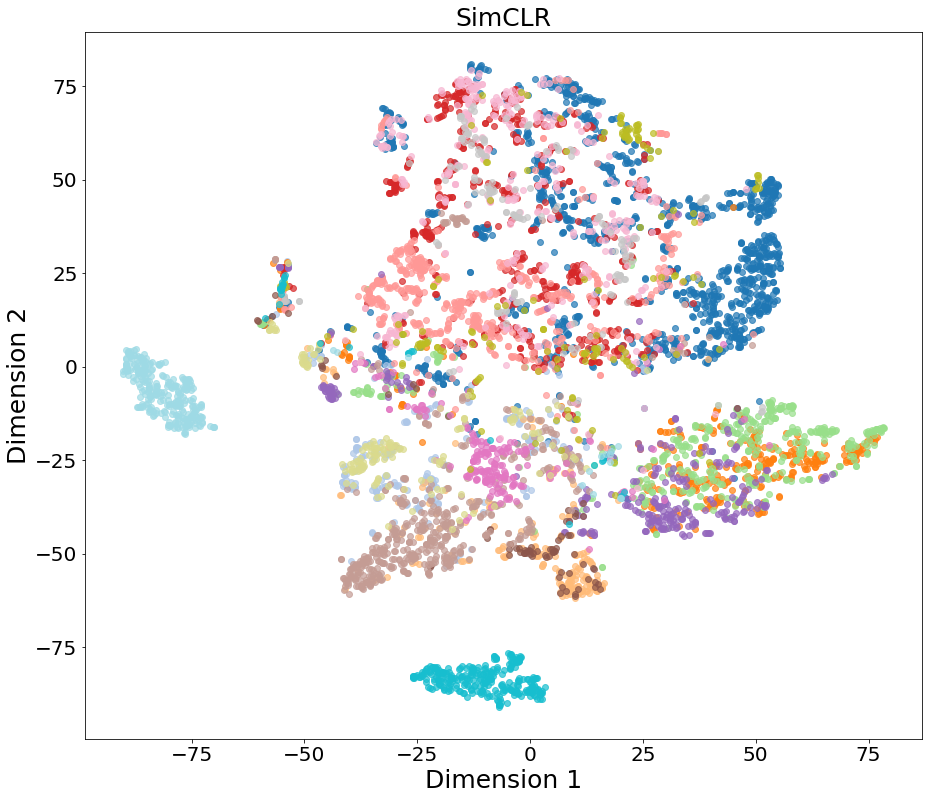

In [66]:
plot_tsne(X_tsne, y, classes)

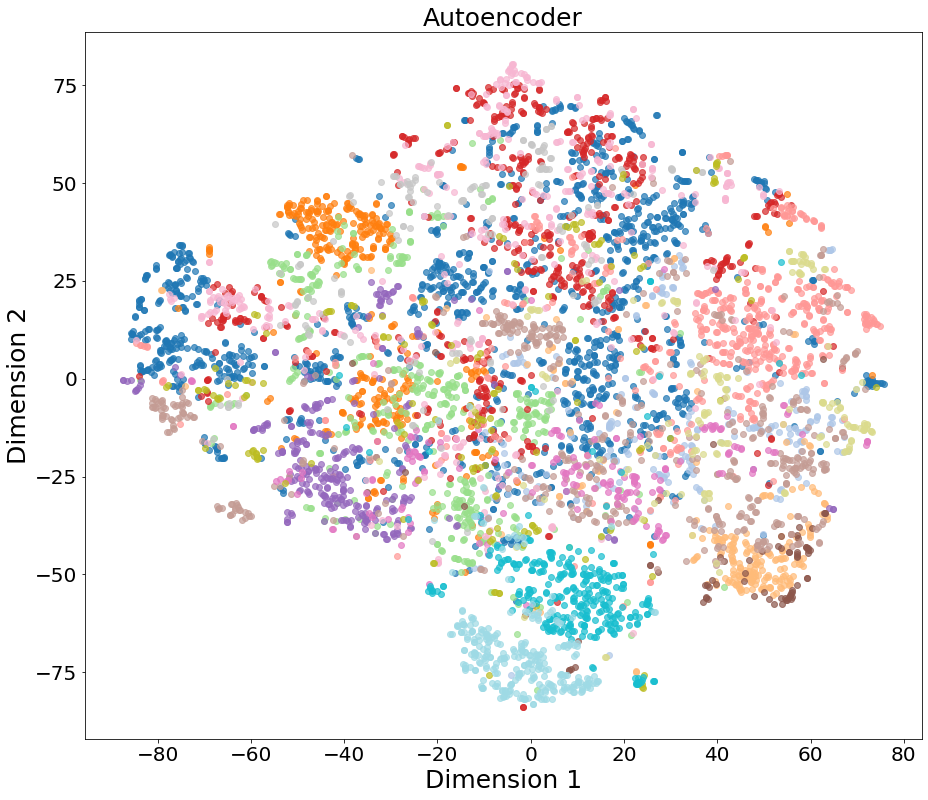

In [86]:
plot_tsne(X_tsne, y, classes)

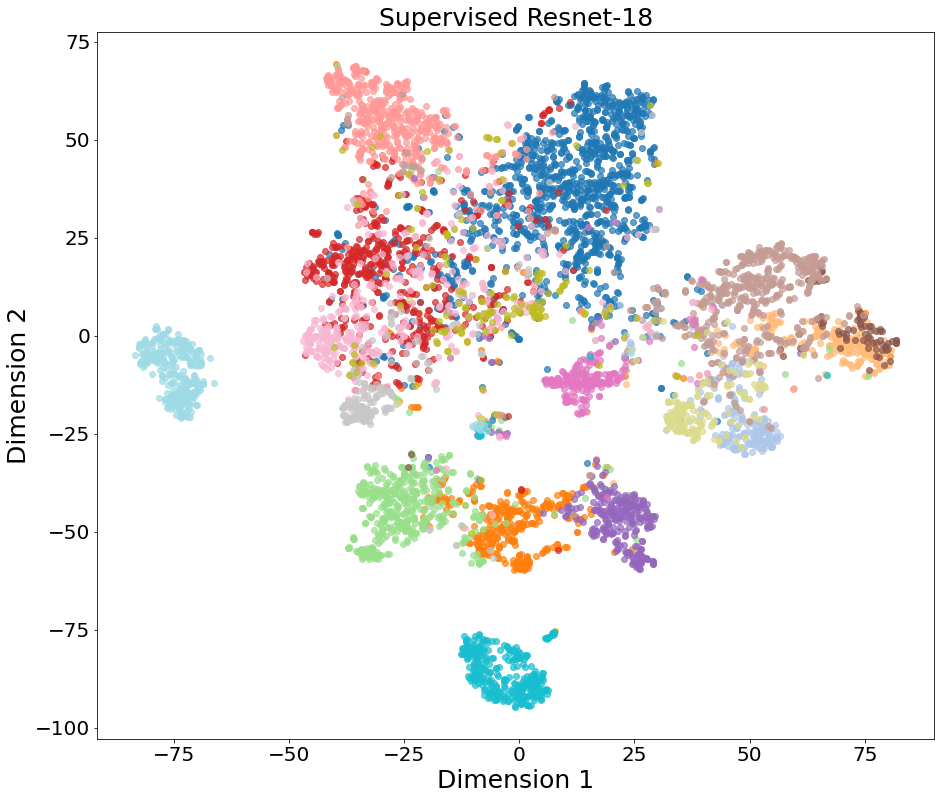

In [76]:
plot_tsne(X_tsne, y, classes)

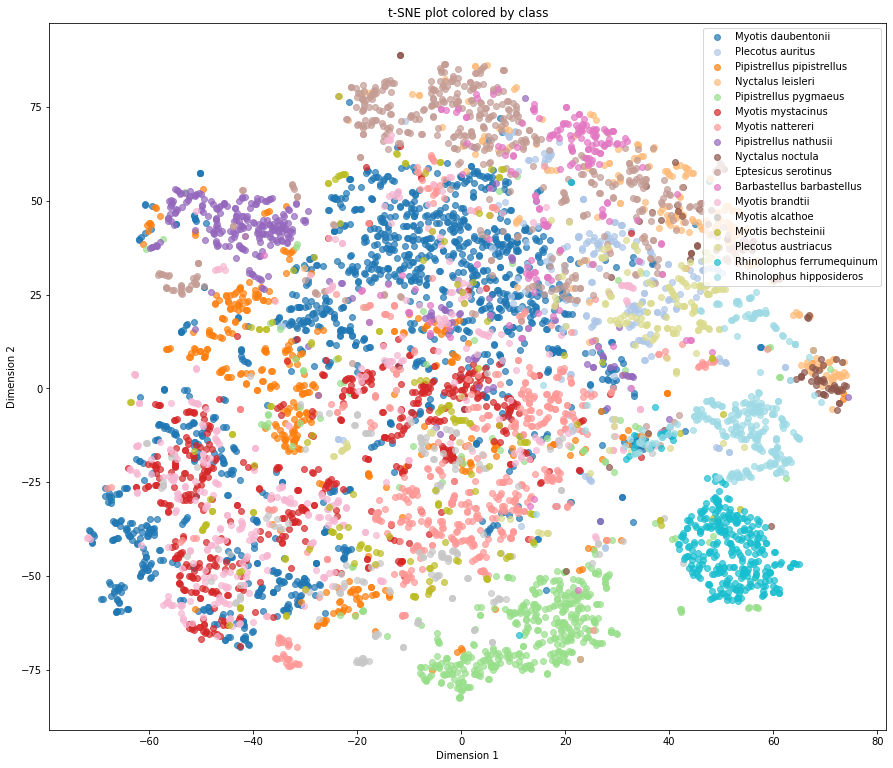

In [11]:
plot_tsne(X_tsne, y, classes)

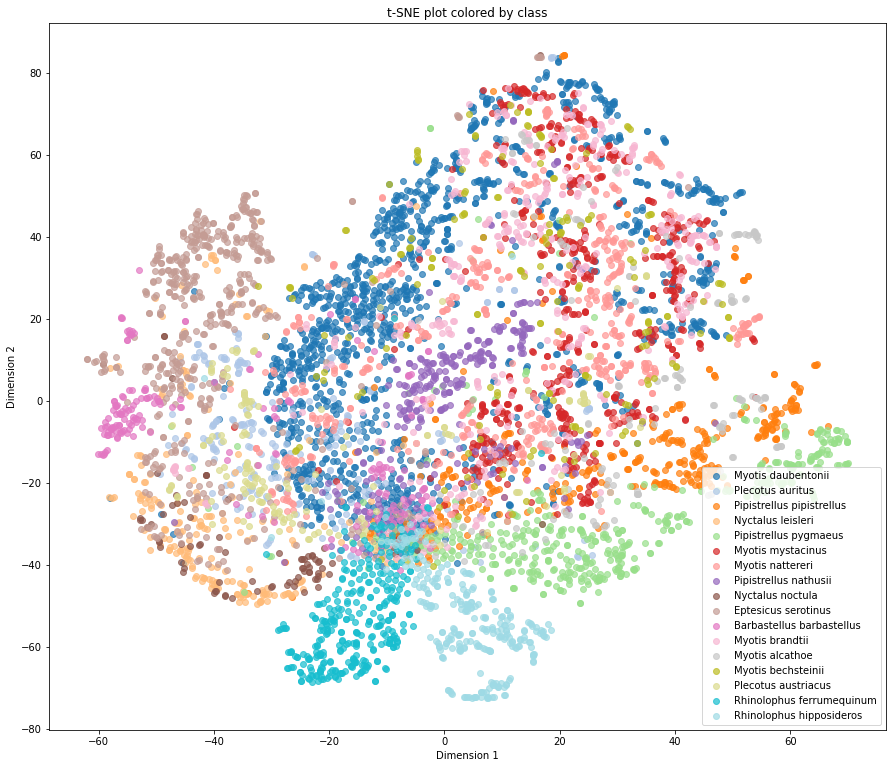

In [18]:
plot_tsne(X_tsne, y, classes)